# Avialinijų vartotojų pasitenkinimo analizė



## Klausimai:
 - Koks faktorius, daro didžiausią įtaką vartotojų pasitenkinimui avialinijomis? 
 - Kokie galimi sprendimai, norint pagerinti klientų pasitenkinimą paslaugomis?


### Reikiamų bibliotekų importavimas:

In [734]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

### Duomenų bazės importavimas ir peržiūra 

In [735]:
df_test = pd.read_csv('test.csv')

In [736]:
df_train = pd.read_csv('train.csv')

In [737]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [738]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [739]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

### Duomenų bazė buvo paruošta modeliavimui, norint turėti daugiau duomenų analizei, nuspręsta duomenų rinkinius sujungti

In [740]:
df = pd.concat([df_train, df_test])
df = df.reset_index()

Patikrinama ar nėra dublikuotų index'ų

In [741]:
df.index.duplicated().sum()

0

Patikrinama ar nėra dublikuotų eilučių

In [742]:
df.duplicated().sum()

0

In [743]:
df.shape

(129880, 26)

In [744]:
df.describe()

,index,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,...,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,...,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Duomenu tvarkymas:
 - Pašalinami nereikalingi stulpeliai
 - Įvairūs simboliai pakeičiami _ , kad galėtume nustatyti vartotojų pasitenkinimo sąryšį su kitais kintamaisiais
 - Pašalinamos null vertės

In [745]:
df = df.drop(columns=['index', 'Unnamed: 0', 'id'])

In [746]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('-', '_')
df.columns = df.columns.str.replace('/', '_')

In [747]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer_Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type_of_Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight_Distance                    129880 non-null  int64  
 6   Inflight_wifi_service              129880 non-null  int64  
 7   Departure_Arrival_time_convenient  129880 non-null  int64  
 8   Ease_of_Online_booking             129880 non-null  int64  
 9   Gate_location                      129880 non-null  int64  
 10  Food_and_drink                     129880 non-null  int64  
 11  Online_boarding                    1298

In [748]:
df.isnull().sum()

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure_Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On_board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
satisfaction                           0
dtype: int64

Atliekama null reikšmių patikra.

In [749]:
df['Arrival_Delay_in_Minutes'].value_counts()

0.0      72753
1.0       2747
2.0       2587
3.0       2442
4.0       2373
         ...  
604.0        1
457.0        1
459.0        1
502.0        1
333.0        1
Name: Arrival_Delay_in_Minutes, Length: 472, dtype: int64

In [750]:
df['Arrival_Delay_in_Minutes'].mean()

15.09112883918849

In [751]:
df['Departure_Delay_in_Minutes'].mean()

14.713712657838004

In [752]:
df.loc[df['Arrival_Delay_in_Minutes'].isnull()]



,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127976,Male,Loyal Customer,45,Business travel,Eco,352,5,1,1,1,...,5,1,1,1,3,2,5,26,NaN,satisfied
128037,Female,Loyal Customer,29,Business travel,Business,3873,3,3,3,3,...,3,3,4,4,4,3,3,19,NaN,neutral or dissatisfied
128205,Male,disloyal Customer,38,Business travel,Business,759,3,3,3,1,...,4,3,3,5,5,4,4,0,NaN,satisfied
129032,Female,Loyal Customer,52,Business travel,Business,3659,5,5,5,5,...,5,5,5,5,3,5,3,0,NaN,satisfied


In [753]:
df[['Arrival_Delay_in_Minutes', 'Departure_Delay_in_Minutes']].sort_values('Arrival_Delay_in_Minutes', ascending = False)

,Arrival_Delay_in_Minutes,Departure_Delay_in_Minutes
83741,1584.0,1592
6744,1280.0,1305
121333,1115.0,1128
61310,1011.0,1017
72206,970.0,978
...,...,...
127976,NaN,26
128037,NaN,19
128205,NaN,0
129032,NaN,0


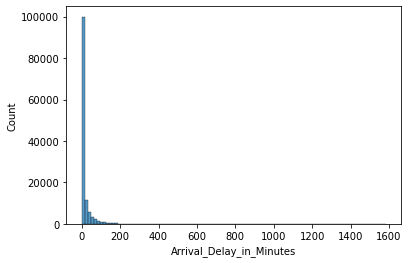

In [754]:
sns.histplot(df, x = 'Arrival_Delay_in_Minutes', bins = 100);



In [755]:
df['Arrival_Delay_in_Minutes'] = df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].mean())

In [756]:
df.isnull().sum()

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure_Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On_board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

### Sukuriamos funkcijos reikšmių keitimui į skaitines vertes

In [757]:
def gender(gender):
    if gender == 'Female':
        return 1
    else:
        return 0
    
def customer_type(customer):
    if customer == 'Loyal Customer':
        return 1
    else:
        return 0

    
def travel_type(travel):
    if travel == 'Business travel':
        return 1
    else:
        return 0
    
def tclass(tclass):
    if tclass == 'Business':
        return 2
    elif tclass == 'Eco Plus':
        return 1
    else:
        return 0    
    
def satisfaction(satisfaction):
    if satisfaction == 'satisfied':
        return 1
    else:
        return 0
    
   
df['Gender_num'] = df['Gender'].map(gender)
df['Customer_Type_num'] = df['Customer_Type'].map(customer_type)
df['Type_of_Travel_num'] = df['Type_of_Travel'].map(travel_type)
df['Class_num'] = df['Class'].map(tclass)
df['satisfaction_num'] = df['satisfaction'].map(satisfaction)


### Duomenų patikrinimas

In [758]:
df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On_board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction', 'Gender_num', 'Customer_Type_num', 'Type_of_Travel_num',
       'Class_num', 'satisfaction_num'],
      dtype='object')

ar visi faktoriai koreliuoja su vartotojų pasitenkinimu:

In [770]:
model = smf.logit(formula='satisfaction_num ~ Gender_num + Customer_Type_num + Age + Type_of_Travel_num + Class_num + Flight_Distance + Ease_of_Online_booking + Inflight_wifi_service + Gate_location + Food_and_drink + Online_boarding + Seat_comfort + Inflight_entertainment + Leg_room_service + Departure_Arrival_time_convenient + On_board_service + Baggage_handling + Checkin_service + Inflight_service + Cleanliness + Departure_Delay_in_Minutes + Arrival_Delay_in_Minutes' , data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.335345
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       satisfaction_num   No. Observations:               129880
Model:                          Logit   Df Residuals:                   129857
Method:                           MLE   Df Model:                           22
Date:                Mon, 23 May 2022   Pseudo R-squ.:                  0.5101
Time:                        10:44:18   Log-Likelihood:                -43555.
converged:                       True   LL-Null:                       -88907.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -11.2926      0.076   -147.912      0.000     -11.442     -11.143
Gender_num                           -0.0665      0.017     -3.830      0.000      -0.101      -0.032
Customer_Type_num                     2.0041      0.026     75.846      0.000       1.952       2.056
Age                                  -0.0083      0.001    -13.071      0.000      -0.010      -0.007
Type_of_Travel_num                    2.7549      0.028     98.489      0.000       2.700       2.810
Class_num                             0.3463      0.011     30.332      0.000       0.324       0.369
Flight_Distance                    3.009e-06   9.96e-06      0.302      0.763   -1.65e-05    2.25e-05
Ease_of_Online_booking               -0.1470      0.010    -14.573      0.000      -0.167      -0.127
Inflight_wifi_service                 0.3935      0.010     38.557      0.000       0.373       0.413
Gate_location                         0.0255      0.008      3.120      0.002       0.009       0.041
Food_and_drink                       -0.0266      0.010     -2.781      0.005      -0.045      -0.008
Online_boarding                       0.6137      0.009     67.310      0.000       0.596       0.632
Seat_comfort                          0.0688      0.010      6.899      0.000       0.049       0.088
Inflight_entertainment                0.0546      0.013      4.290      0.000       0.030       0.080
Leg_room_service                      0.2512      0.008     33.044      0.000       0.236       0.266
Departure_Arrival_time_convenient    -0.1343      0.007    -18.389      0.000      -0.149      -0.120
On_board_service                      0.3055      0.009     33.601      0.000       0.288       0.323
Baggage_handling                      0.1369      0.010     13.424      0.000       0.117       0.157
Checkin_service                       0.3303      0.008     43.287      0.000       0.315       0.345
Inflight_service                      0.1250      0.011     11.634      0.000       0.104       0.146
Cleanliness                           0.2258      0.011     20.909      0.000       0.205       0.247
Departure_Delay_in_Minutes            0.0037      0.001      4.446      0.000       0.002       0.005
Arrival_Delay_in_Minutes             -0.0086      0.001    -10.485      0.000      -0.010      -0.007
=====================================================================================================
"""

 - visi faktoriai koreliuoja su vartotojų pasitenkinimo rodikliu
 - didžiausias koficientas: __kelionės tipo ir keleivio lojalumo__

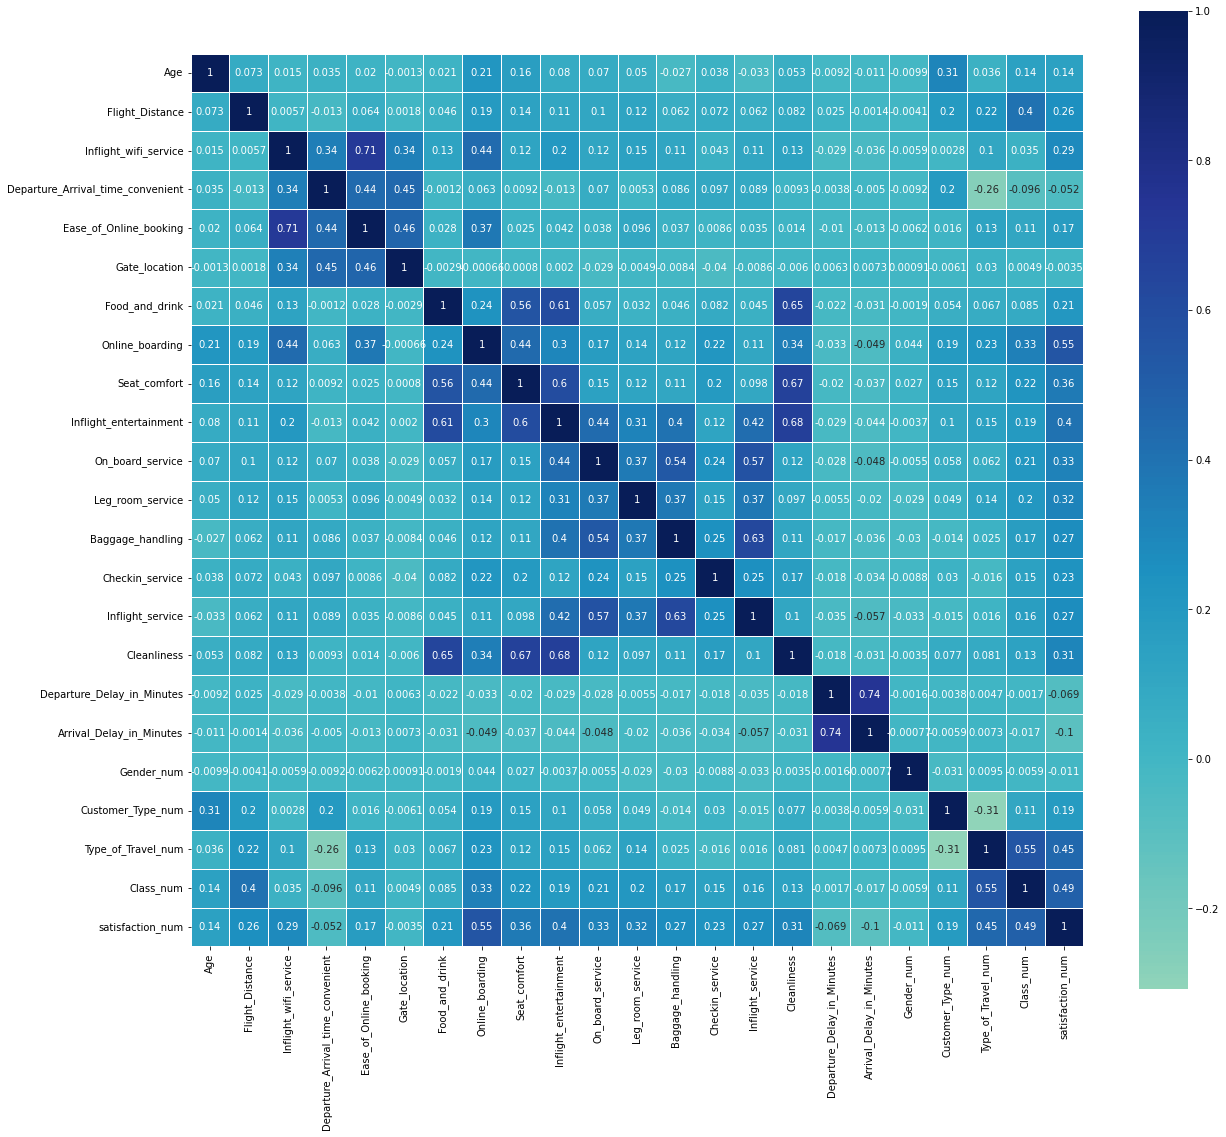

In [772]:
corr = df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(20, 18))
sns.heatmap(corr, annot = True, cmap="YlGnBu", center=0,
            square=True, linewidths=.5);

 - Daugiausiai koreliuoja __registracija skrydžiui internetu, klasė ir kelionės tipas.__

### Duomenų vizualizacija ir apžvalga

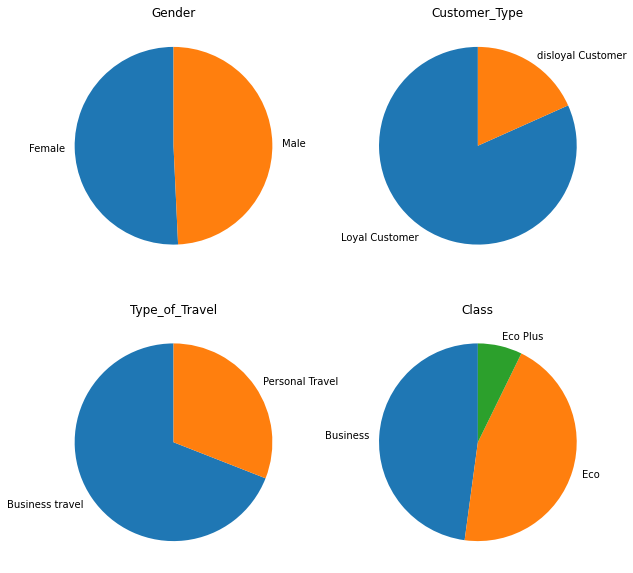

In [769]:
columns = ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class']
fig, ax = plt.subplots(2,2, figsize=(10,10))
for i, column in enumerate(columns):
    column_values = df[column].value_counts()
    label = column_values.index
    size = column_values.values   
    ax[i//2, i%2].pie(size, labels = label, startangle = 90)
    ax[i//2, i%2].set_title(column)
    

 - Moterų ir vyrų avialiniomis skrenda vienodai (arba įvertinimus užpildė)
 - Didžioji dalis keleivių yra lojalūs klientai 
 - Didžioji dalis keliautojų keliauja verslo reikalais
 - Dažniausiai pasirenkamos klasės yra Econominė ir Business
 - Kiti rezultatai pakankamai stipriai variuoja, todėl kolkas sunku daryti kažkokias prielaidas

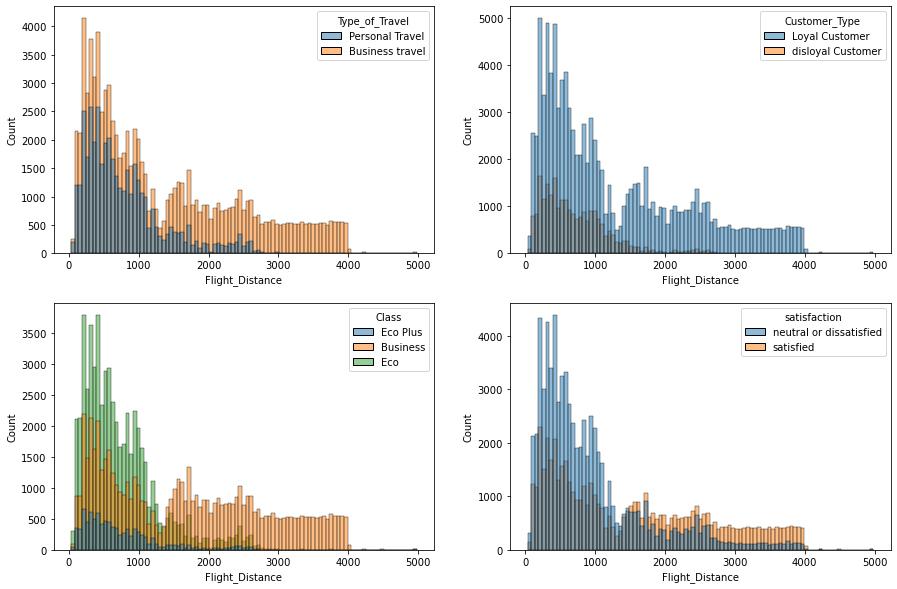

In [712]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.histplot(df, x = 'Flight_Distance', hue = 'Type_of_Travel', ax=ax[0][0])
sns.histplot(df, x = 'Flight_Distance', hue = 'Customer_Type', ax=ax[0][1])
sns.histplot(df, x = 'Flight_Distance', hue = 'Class', ax=ax[1][0])
sns.histplot(df, x = 'Flight_Distance', hue = 'satisfaction', ax=ax[1][1]);


 - asmeninės kelionės dažnai yra trumpesnės nei verslo
 - žmonės kurie keliauja trumpus atstumus, dažniausiai renkasi ekonominę klasę
 - trumpos kelionės dažnai yra įvertinamos neutraliai arba neigiamai

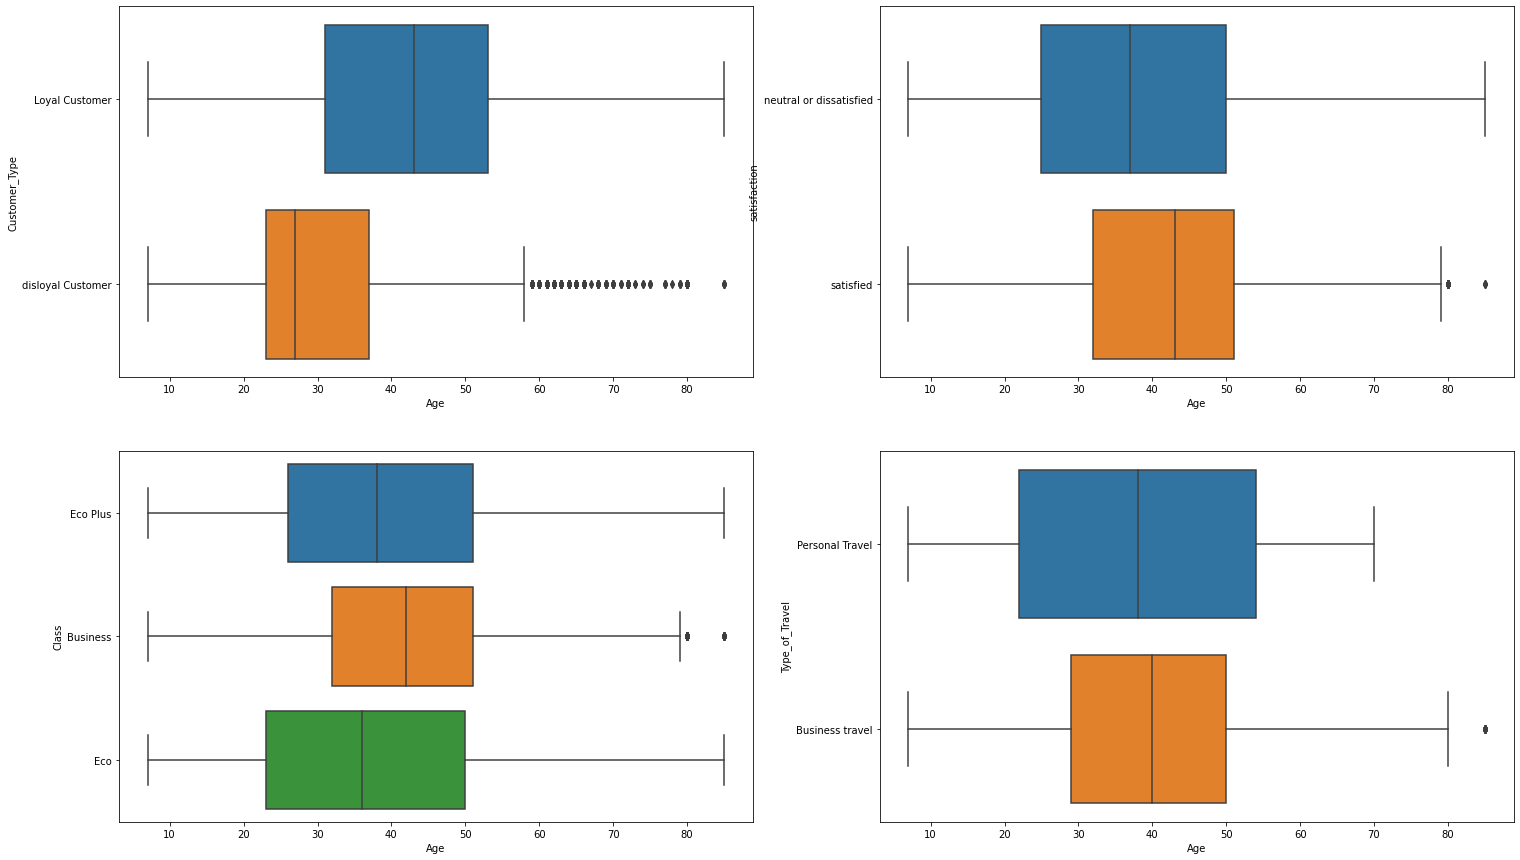

In [713]:
fig, ax = plt.subplots(2,2, figsize=(25,15))

sns.boxplot(x='Age', y='Customer_Type',
            data=df,
            ax=ax[0][0]);
sns.boxplot(x='Age', y='satisfaction',
            data=df,
            ax=ax[0][1]);
sns.boxplot(x='Age', y='Class',
            data=df,
            ax=ax[1][0]);
sns.boxplot(x='Age', y='Type_of_Travel',
            data=df,
            ax=ax[1][1]);

 - Vyresni žmonės dažniau yra lojalūs klientai

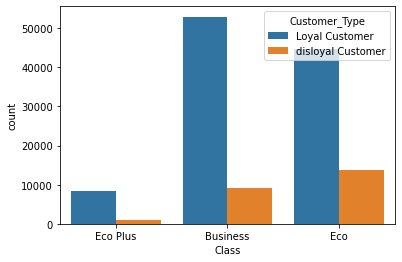

In [714]:
sns.countplot(data = df, x = 'Class', hue = 'Customer_Type');

 - Klientų lojalumas neturi įtakos klasės pasirinkimui

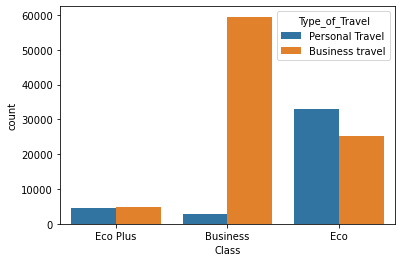

In [715]:
sns.countplot(data = df, x = 'Class', hue = 'Type_of_Travel');

 - Kelionės tipas neturi įtakos ekonominės klasės pasirinkimui, tačiau verslo kelionės dominuoja verslo klasėje, asmeninėms kelionėms verslo klasė nesirankama.

#### Bendras patenkintų klientų procentas:

In [716]:
round(df['satisfaction_num'].mean() * 100, 2)

43.45

In [717]:
round(df.groupby('Type_of_Travel')[['satisfaction_num']].mean() * 100, 2)

,satisfaction_num
Type_of_Travel,
Business travel,58.37
Personal Travel,10.13


In [718]:
round(df.groupby('Customer_Type')[['satisfaction_num']].mean() * 100, 2)

,satisfaction_num
Customer_Type,
Loyal Customer,47.81
disloyal Customer,23.97


In [719]:
round(df.groupby('Class')[['satisfaction_num']].mean() * 100, 2)

,satisfaction_num
Class,
Business,69.44
Eco,18.77
Eco Plus,24.64


### Kodėl skrydžio klasė nulemia gera/blogą vartotojų įvetinimą?
### Kodėl ekonominės klasės klientai dažniausiai yra nepatenkinti paslaugomis?
### Kokie galimi sprendimai, norint pagerinti klientų pasitenkinimą paslaugomis?


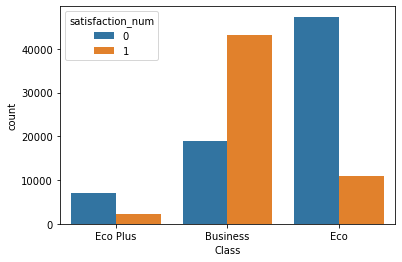

In [720]:
sns.countplot(data = df, x = 'Class', hue = 'satisfaction_num');

Daugiausia nepatenkintų klientų yra ekonominėje klasėje

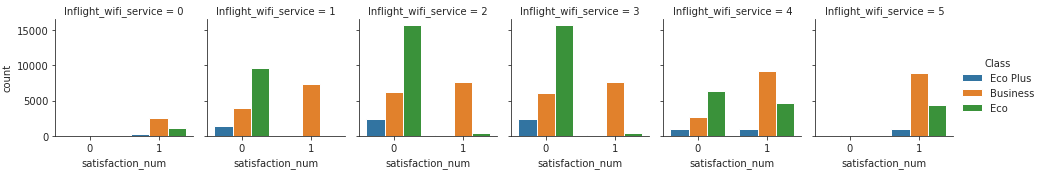

In [733]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data = df, x = "satisfaction_num", col="Inflight_wifi_service", hue = 'Class', col_wrap=6, kind="count", height=2.5, aspect=.9)
    

Ekonominės klasės klientai wifi lėktuve dažniausiai vertina vidutiniškai ir visais atvejais tai prisideda prie neigiamo bendro paslaugų įvetinimo

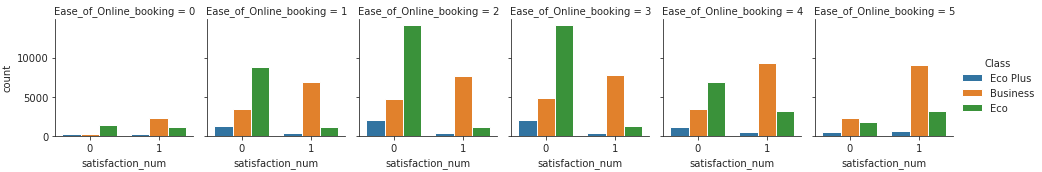

In [722]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data = df, x = "satisfaction_num", col="Ease_of_Online_booking", hue = 'Class', col_wrap=6, kind="count", height=2.5, aspect=.9)

Ekonominės klasės klientai paprastumą bilietą įsiguti internetu, dažniausiai vertina vidutiniškai ir visais atvejais tai prisideda prie neigiamo bendro paslaugų įvetinimo

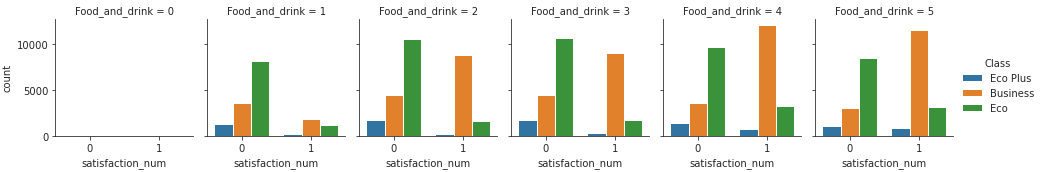

In [723]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data = df, x = "satisfaction_num", col="Food_and_drink", hue = 'Class', col_wrap=6, kind="count", height=2.5, aspect=.9)
    

Maistas ir gėrimai dažnu atveju neliame bendro paslaugų įveritnimo

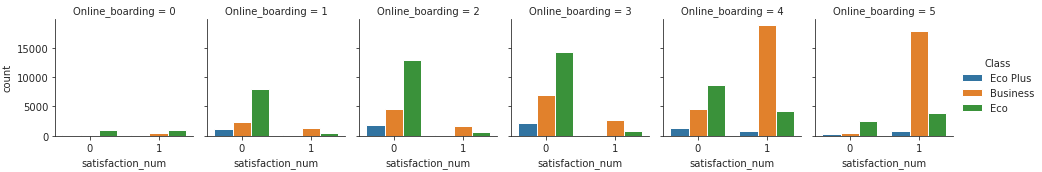

In [724]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data = df, x = "satisfaction_num", col="Online_boarding", hue = 'Class', col_wrap=6, kind="count", height=2.5, aspect=.9)
    

Online boarding ekonominės klasės klientai vertina vidutiniškai ir tokie vertinimai yra susiję su bendru neigiamu vertinimu

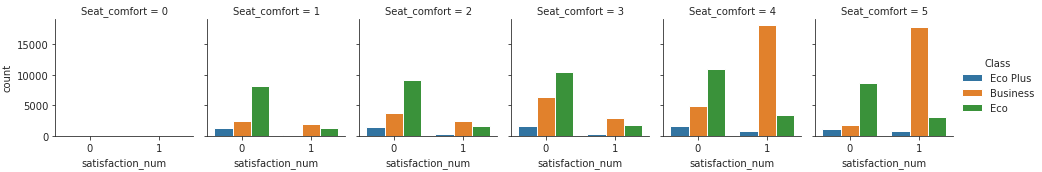

In [725]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data = df, x = "satisfaction_num", col="Seat_comfort", hue = 'Class', col_wrap=6, kind="count", height=2.5, aspect=.9)
    

Sėdynių patogumas ekonominės klasės klientams nenulemia bendro paslaugų veritnimo, tačiau verslo klasės klientai vertindami paslaugas aukštu balu, dažnai vertina ir bendrą paslaugą teigiamai.

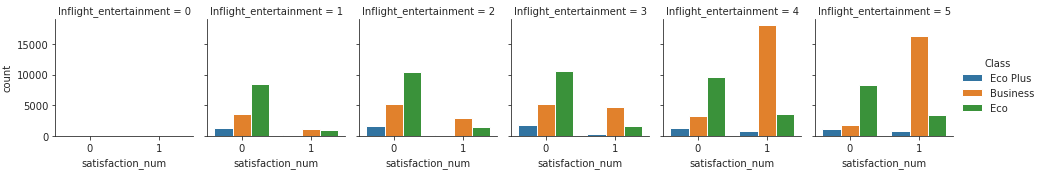

In [726]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data = df, x = "satisfaction_num", col="Inflight_entertainment", hue = 'Class', col_wrap=6, kind="count", height=2.5, aspect=.9)
    

Ekonominės klasės klientams užimtumas skrydžio metu nenuliame bendro vertinimo, tačiau verslo klasės klientai duodami aukštą balą šiai paslaugai dažnai ir bendrai viską vertian teigiamai

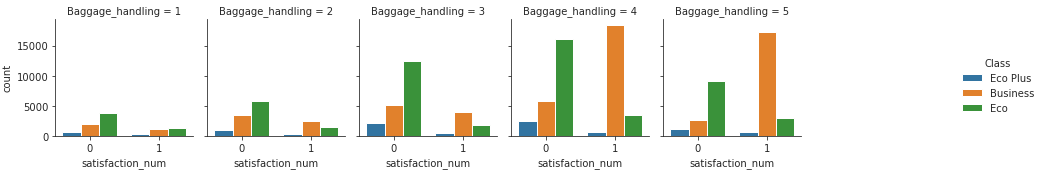

In [727]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data = df, x = "satisfaction_num", col="Baggage_handling", hue = 'Class', col_wrap=6, kind="count", height=2.5, aspect=.9)
    

Bagažo transportavimas ekonominės klasės klientams dažnai yra vertinamas vidutiniškai, tačiau toks įvertinimas dažnai neužtikrina teigiamo bendro įvertinimo. Verslo klientams priešingai

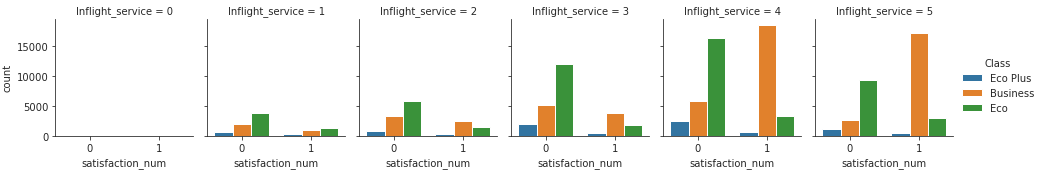

In [728]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data = df, x = "satisfaction_num", col="Inflight_service", hue = 'Class', col_wrap=6, kind="count", height=2.5, aspect=.9)
    

Ekonominės klasės klientams aptarnavimas aukštas aptarnavimo skydžiu balas dažnai nenuliame gero bendro įvertinimo.

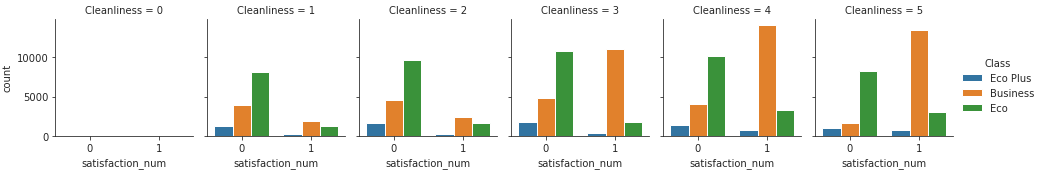

In [729]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data = df, x = "satisfaction_num", col="Cleanliness", hue = 'Class', col_wrap=6, kind="count", height=2.5, aspect=.9)
    

Švara ekonominės klasės klientams nenulemia bendro aukšto paslaugų įvertinimo.

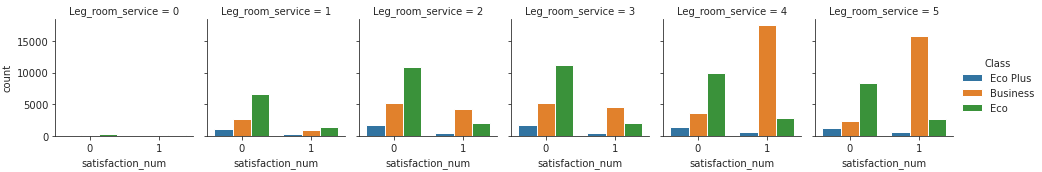

In [730]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data = df, x = "satisfaction_num", col="Leg_room_service", hue = 'Class', col_wrap=6, kind="count", height=2.5, aspect=.9)
    

Ekonominės klasės klientai įvariai vertina vietą kojoms, tačiau tai nenulemia bendro gero įvertinimo.

 - Ekonominės klasės klientams svarbu: __wifi lėktuve, bilieto prieinamumas interntu, registracija skrydžiui internetu__ šių paslaugų vertinimas vidutiniškai dažnai atsiliepia ir bendrame paslaugos vertinime

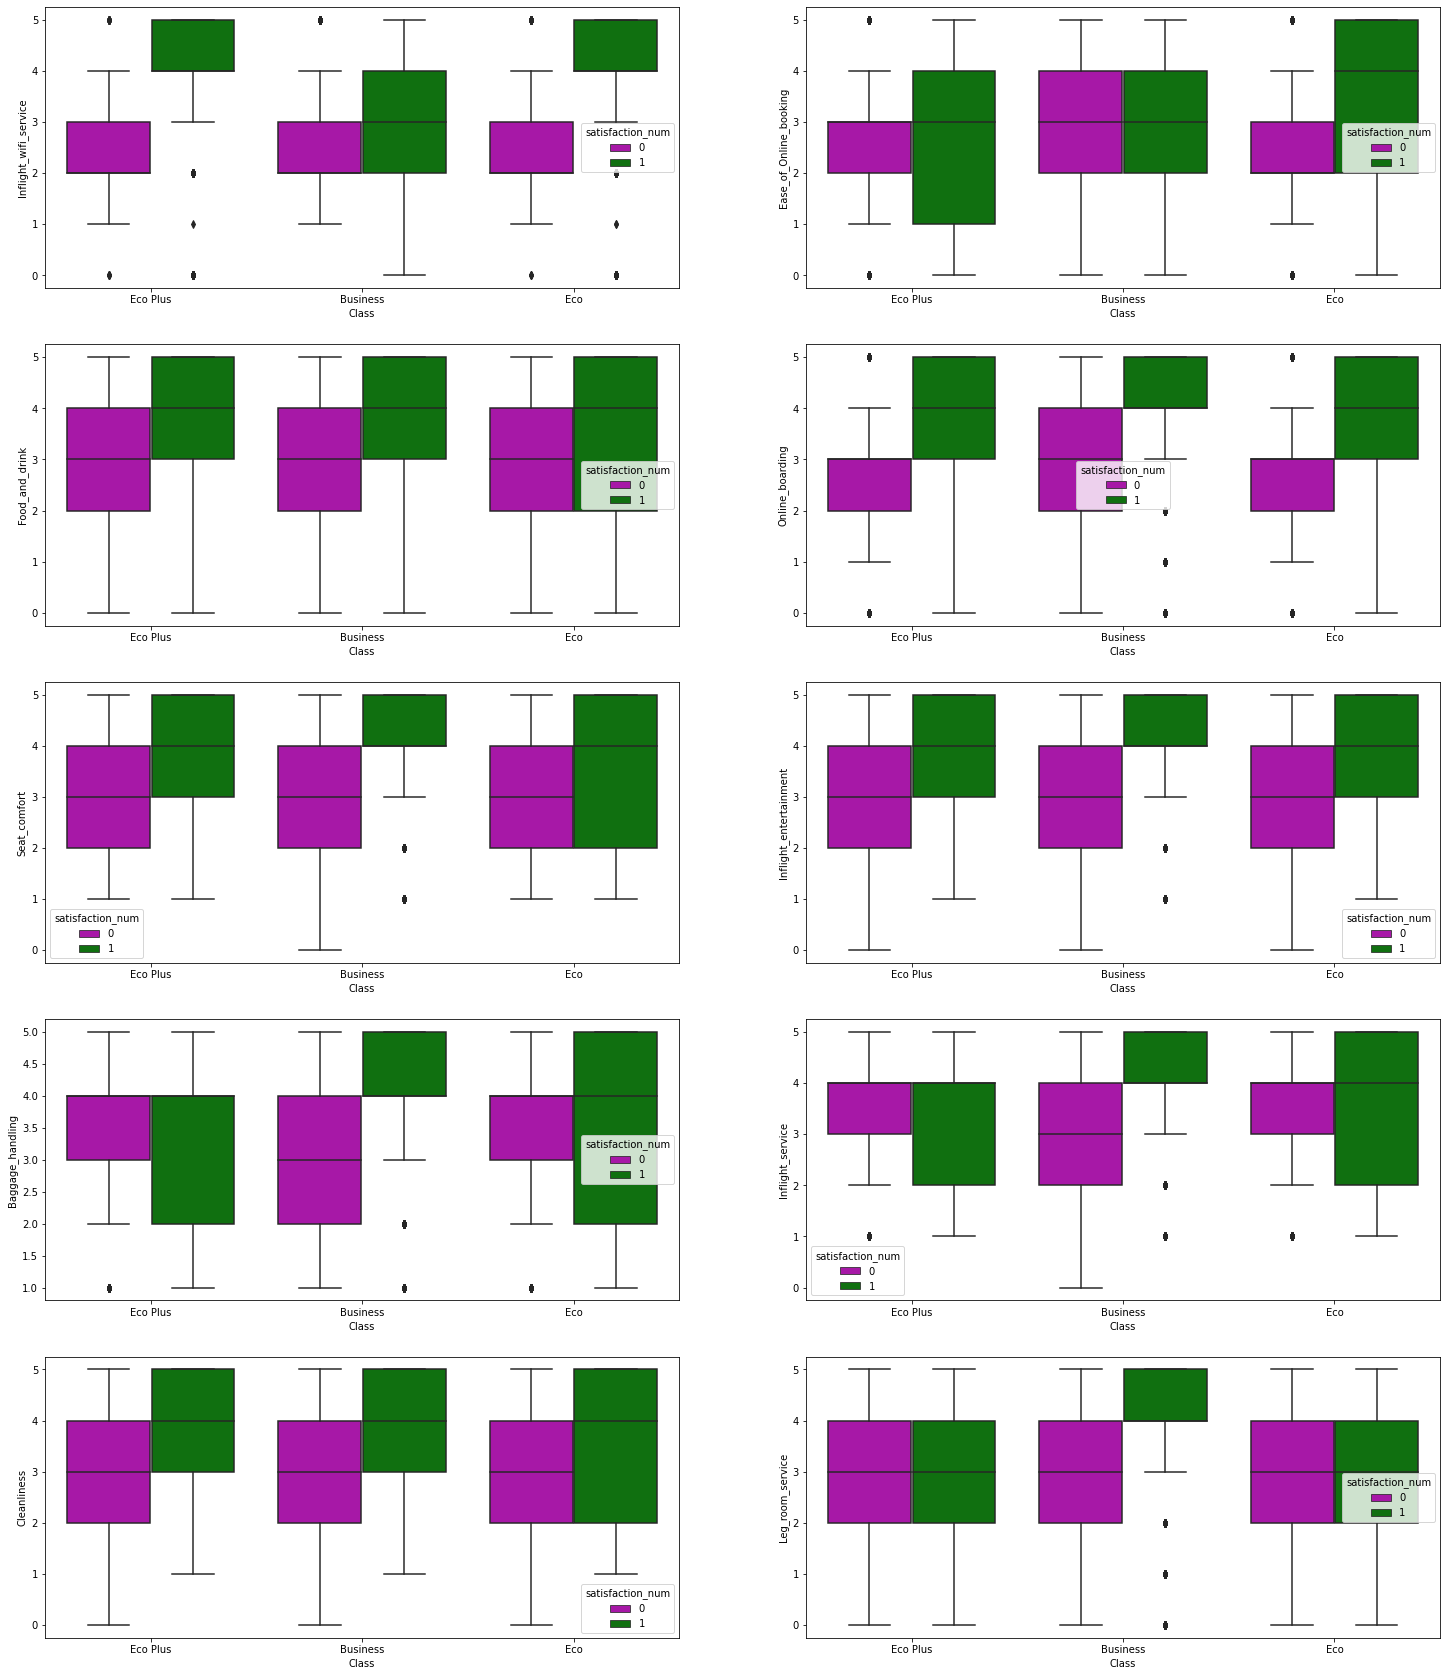

In [731]:
fig, ax = plt.subplots(5,2, figsize=(25,30))
sns.boxplot(x="Class", y="Inflight_wifi_service",
            hue="satisfaction_num", palette=["m", "g"],
            data=df, ax=ax[0][0]);
sns.boxplot(x="Class", y="Ease_of_Online_booking",
            hue="satisfaction_num", palette=["m", "g"],
            data=df, ax=ax[0][1]);
sns.boxplot(x="Class", y="Food_and_drink",
            hue="satisfaction_num", palette=["m", "g"],
            data=df, ax=ax[1][0]);
sns.boxplot(x="Class", y="Online_boarding",
            hue="satisfaction_num", palette=["m", "g"],
            data=df, ax=ax[1][1]);
sns.boxplot(x="Class", y="Seat_comfort",
            hue="satisfaction_num", palette=["m", "g"],
            data=df, ax=ax[2][0]);
sns.boxplot(x="Class", y="Inflight_entertainment",
            hue="satisfaction_num", palette=["m", "g"],
            data=df, ax=ax[2][1]);
sns.boxplot(x="Class", y="Baggage_handling",
            hue="satisfaction_num", palette=["m", "g"],
            data=df, ax=ax[3][0]);
sns.boxplot(x="Class", y="Inflight_service",
            hue="satisfaction_num", palette=["m", "g"],
            data=df, ax=ax[3][1]);
sns.boxplot(x="Class", y="Cleanliness",
            hue="satisfaction_num", palette=["m", "g"],
            data=df, ax=ax[4][0]);
sns.boxplot(x="Class", y="Leg_room_service",
            hue="satisfaction_num", palette=["m", "g"],
            data=df, ax=ax[4][1]);

 - Ekonominės klasės kleiviai bendrai paslaugomis yra patenkinti tada, kai atskiri paslaugų komponentai yra vertinami aukščiausiu balu.
 - Vidutiniški įvertinimai neužtikrina to, kad bendras vartotojų pasitenkinimas bus teigiamas.
 - Verslo klasės klientai dažnu atveju yra patenkinti paslaugų kokybe ir aukštai vertina visas paslaugas atskirai.

# Rekomendacijos

 - Norint pagerinti ekonominės klasės vartotojų vertinimą, reikėtų užtikrinti paslaugų teikiamu internetu kokybę: __bilieto prieinamumas interntu, registracija skrydžiui internetu__
 - Ypatingą dėmesį reikėtų skirti __registracijai skrydžiui internetu__, nes tai ne tik svarbu ekonominės klasės klientams, bet korialiacinės analizės metu ši paslauga išsiskyrė tiesiogine įtaka vartotojų pasitenkinimo rodikliui.
 - Taip pat būtų galima suteikti prieigą prie __geresnio interneto skrydžio metu__.
